<a href="https://colab.research.google.com/github/auliyaa05/202055202047-auliyaa/blob/master/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /content/garbage

In [2]:
!unzip /content/drive/MyDrive/TugasDeepLearning/archive.zip -d /content/garbage

Streaming output truncated to the last 5000 lines.
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: /content/garbage/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inf

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = os.path.join('/content/garbage/garbage classification/Garbage classification/')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [5]:
for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


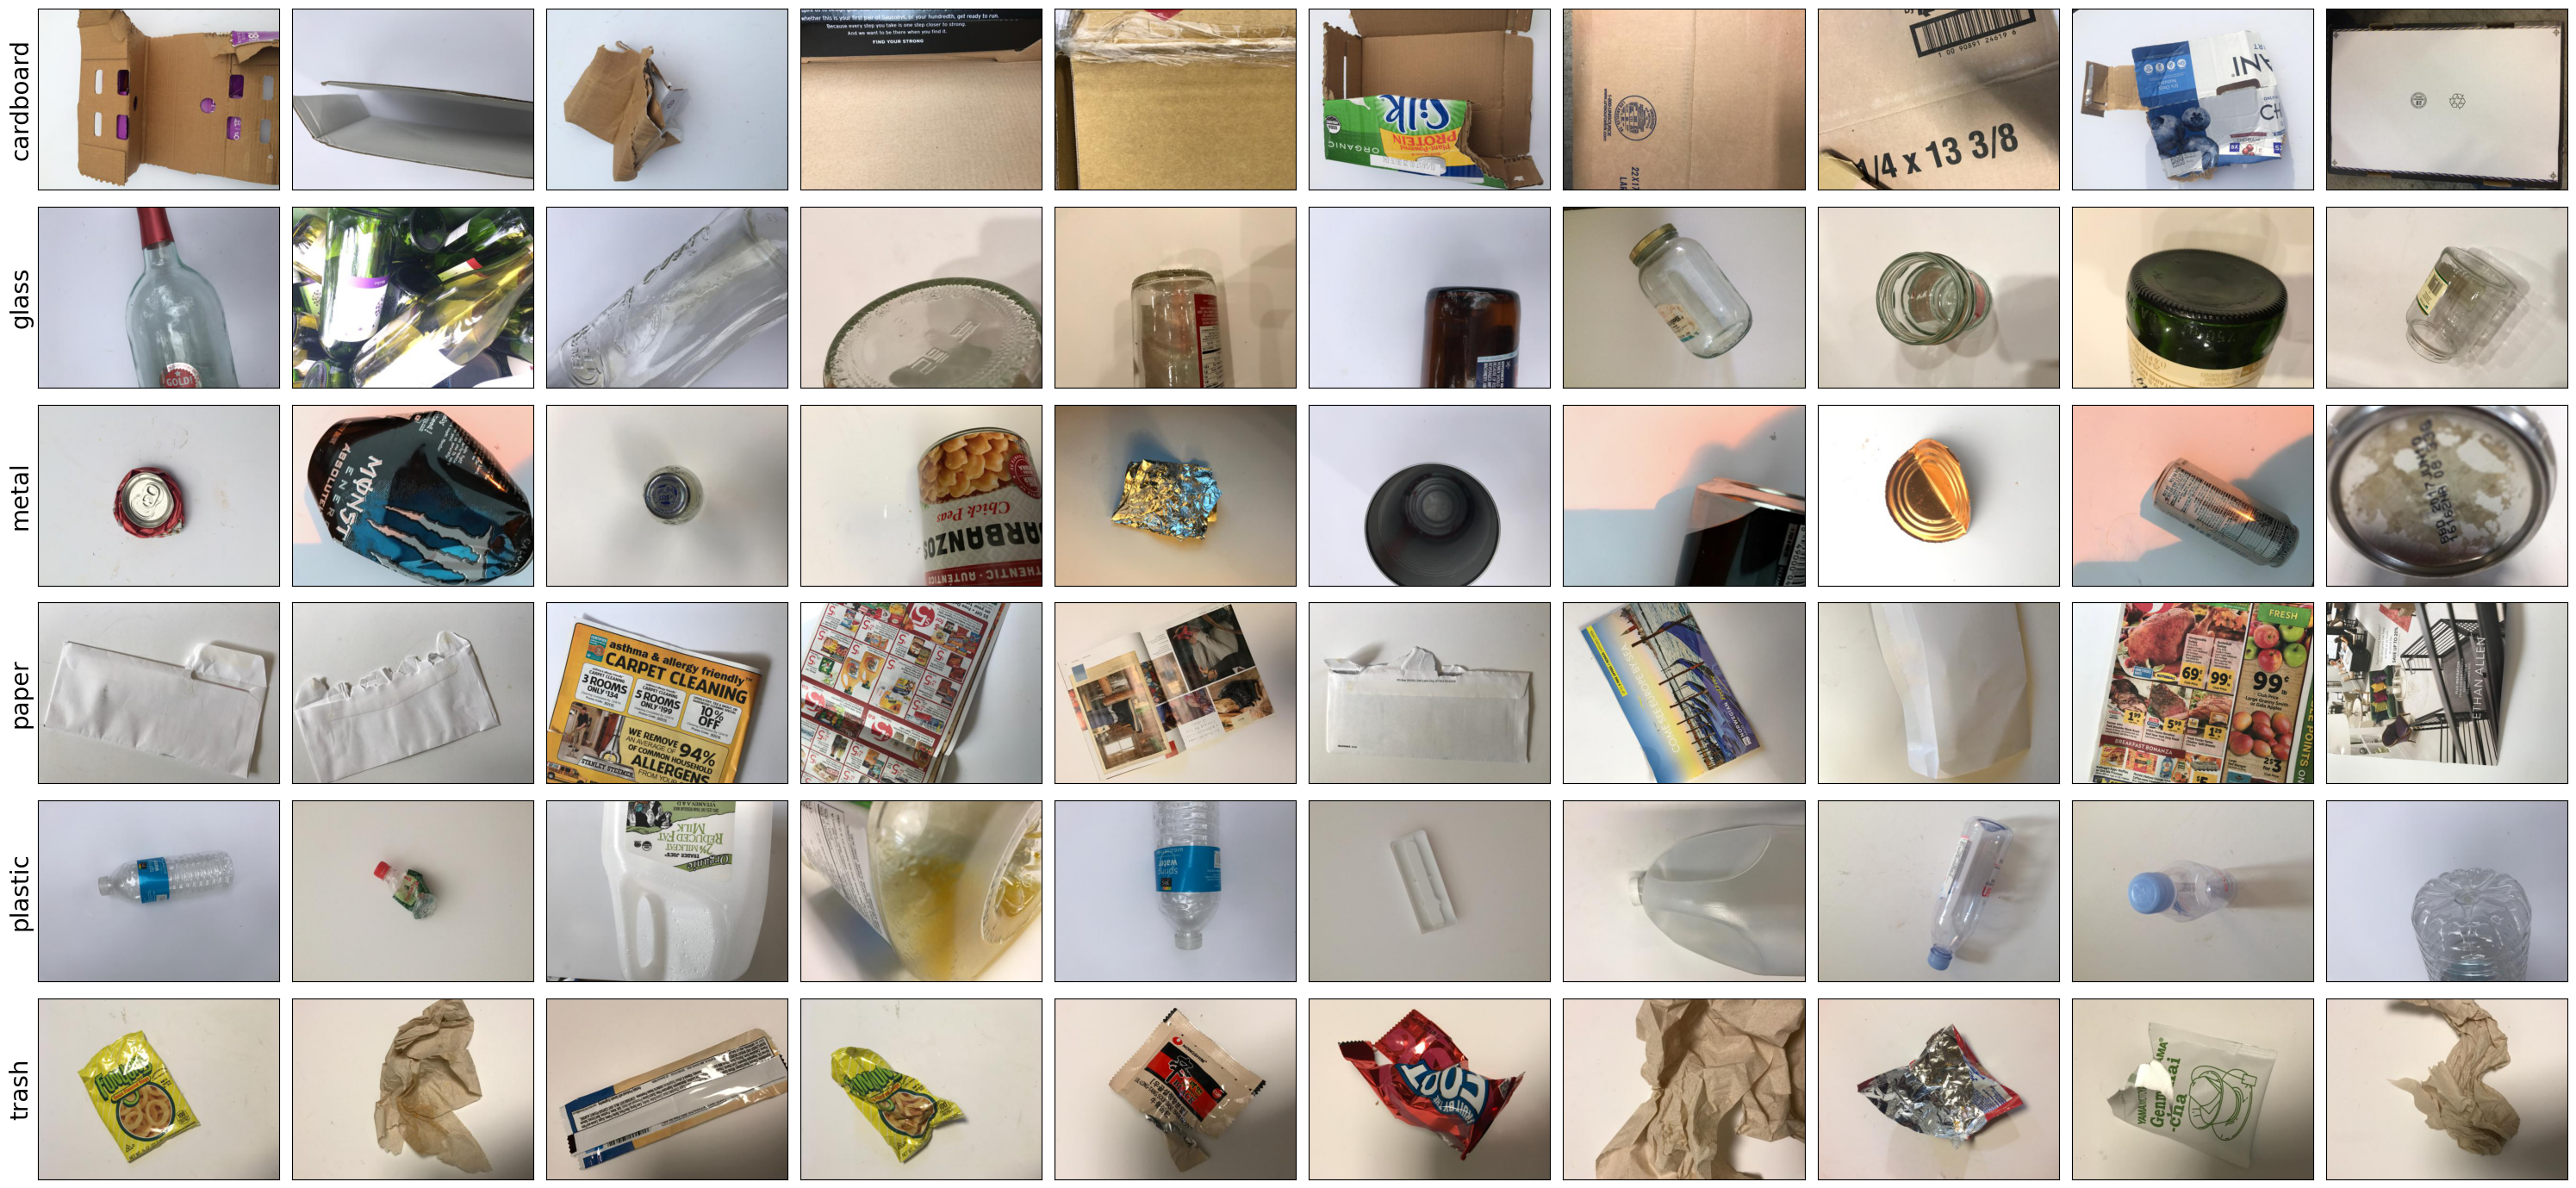

In [6]:
plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [7]:
directory = os.path.join(train_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),  
  
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 382, 510, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 382, 510, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 380, 508, 32)      9248      
                                                                 
 batch_normalization_10 (Bat  (None, 380, 508, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 190, 254, 32)     0         
 2D)                                                             
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [13]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
64/64 [==============================] - 187s 2s/step - loss: 1.8466 - accuracy: 0.4496 - val_loss: 2.7141 - val_accuracy: 0.1909
Epoch 2/50
64/64 [==============================] - 138s 2s/step - loss: 1.3287 - accuracy: 0.5252 - val_loss: 3.3206 - val_accuracy: 0.1988
Epoch 3/50
64/64 [==============================] - 141s 2s/step - loss: 1.1952 - accuracy: 0.5791 - val_loss: 2.3888 - val_accuracy: 0.2207
Epoch 4/50
64/64 [==============================] - 157s 2s/step - loss: 1.1630 - accuracy: 0.5939 - val_loss: 3.0845 - val_accuracy: 0.1471
Epoch 5/50
64/64 [==============================] - 141s 2s/step - loss: 1.0931 - accuracy: 0.6097 - val_loss: 2.9815 - val_accuracy: 0.2286
Epoch 6/50
64/64 [==============================] - 141s 2s/step - loss: 1.0980 - accuracy: 0.6077 - val_loss: 2.7356 - val_accuracy: 0.2584
Epoch 7/50
64/64 [==============================] - 140s 2s/step - loss: 0.9724 - accuracy: 0.6517 - val_loss: 4.2213 - val_accuracy: 0.2306
Epoch 8/50
64